# Extract chemicals with a composite system
- Explore Li+-conducting polymers

In [14]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import joblib
import sys
import os
import glob
import matplotlib.pyplot as plt

from rdkit.Chem import AllChem, Draw
from rdkit import Chem

sys.path.append("../lib/composite")
sys.path.append("../lib")



In [16]:
# process compound database
from CompoundDatabase import CompoundDatabase
from Fingerprint import Fingerprint
from rdkit.Avalon.pyAvalonTools import GetAvalonFP
from LiPolymerDatabase import LiPolymerDatabase
from CompositeUtility import simplify_composite_dict, composite_dict_to_df


fp = Fingerprint()

# load database
database_path = "../database/20210330LiPolymerDB.xlsx"
compound_database = CompoundDatabase(database_path,
                                     fp,
                                     sheet_name="CompoundDatabase_larger"
                                     )
compound_database.calc_fp()
compound_database.process_compound_database()


# composite database
database = LiPolymerDatabase(database_path,
                             compound_database,
                             # temperature_range=(15,35)

                             )
database.process_database()


composite_dict = simplify_composite_dict(database.DBDict)

df = composite_dict_to_df(composite_dict, compound_database)

# use only 2nd and 3rd components (i.e, 1st are mostly salts)
df = df.iloc[:, 512:]

# if you want to learn salts (only to check regression acc)
#df = df.iloc[:,:]

df

RDKit ERROR: [18:39:49] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [18:39:49] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
RDKit ERROR: 
RDKit ERROR: [18:39:49] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
RDKit ERROR: 
RDKit ERROR: [18:39:49] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [18:39:49] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [18:39:50] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [18:39:50] Explicit valence for atom # 2 Ge, 6, is greater than permitted
RDKit ERROR: [18:39:50] Explicit valence for atom # 8 Ge, 6, is greater than permitted
RDKit WARNING: [18:39:50] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [18:39:50] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [18:39:51] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 

,FP0,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,...,FP1527,FP1528,FP1529,FP1530,FP1531,FP1532,FP1533,FP1534,FP1535,Conductivity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-6.698970
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-6.154902
2,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,-8.698970
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2.415258
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2.235314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,-4.976299
1341,1,1,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,-3.667990
1342,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,-3.754959
1343,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,-5.009642


In [17]:
#show electrolyte info.
#repeating units for polymers are expressed by "Mg" symbols in the database
composite_dict[0]

{'Conductivity': 2e-07,
 'smiles_list': ['O=Cl(=O)([O-])=O', '[Mg]OCC[Mg]', 'Blank'],
 'SMILES_wt_list': array([0.10784791, 0.89215209, 0.        ])}

In [18]:
# calculate fingerprints
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Conductivity"] = scaler.fit_transform(df[["Conductivity"]])
df

,FP0,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,...,FP1527,FP1528,FP1529,FP1530,FP1531,FP1532,FP1533,FP1534,FP1535,Conductivity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2.128177
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.774013
2,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,-3.430087
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.660327
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.777463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,-1.006796
1341,1,1,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,-0.155145
1342,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.211758
1343,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,-1.028501


In [20]:
fp_list=df.drop("Conductivity",axis=1).values
#joblib.dump(fp_list,"data/composite_fp.bin")
#joblib.dump(df,"data/df.bin")
#joblib.dump(df,"data/df_salt.bin")


['data/df_salt.bin']

In [6]:
# machine learning
from sklearn.model_selection import train_test_split

target_param = "Conductivity"
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

column_list = list(df.columns)
column_list.remove(target_param)

train_x = list(train_df[column_list].values)
train_y = list(train_df[target_param])

test_x = list(test_df[column_list].values)
test_y = list(test_df[target_param])

Train R2  0.654225931352328
Test R2  0.5705575444101953


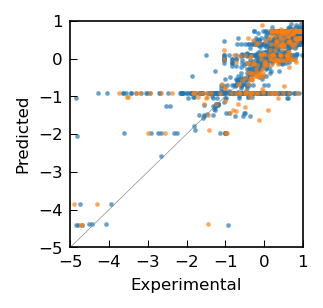

In [7]:
# pls model
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score


model = PLSRegression(n_components=30)
model.fit(train_x, train_y)
Q = np.diag(model.coef_)

p_tr_y = model.predict(train_x)
p_te_y = model.predict(test_x)


plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams["font.size"] = 8

plt.figure(figsize=(2, 2), dpi=150)
plt.scatter(train_y, p_tr_y, s=2, alpha=0.5)
plt.scatter(test_y, p_te_y, s=2, alpha=0.5)


vmax = int(max(df[target_param]))
vmin = int(min(df[target_param]))

plt.xlim(vmin, vmax)
plt.ylim(vmin, vmax)
tick_step = 1

plt.plot([vmin, vmax], [vmin, vmax],
         c="gray",
         linewidth=0.3)

plt.xlabel("Experimental")
plt.ylabel("Predicted")
plt.xticks(np.arange(vmin, vmax+1, step=tick_step))
plt.yticks(np.arange(vmin, vmax+1, step=tick_step))


print("Train R2 ", r2_score(train_y, p_tr_y))
print("Test R2 ", r2_score(test_y, p_te_y))

# RBM
- Learn fingerprints for two additives to lithium salt
- aromatic type compounds are extracted from the database

In [8]:
# firstly, extract composites containing aromatic compounds
from rdkit.Chem import AllChem, Draw, Descriptors, PandasTools
import copy


aromatic_composite_dict = copy.deepcopy(composite_dict)

# extract aromatic compounds
for i in list(aromatic_composite_dict.keys()):
    composite = aromatic_composite_dict[i]
    smiles_list = composite["smiles_list"]

    aromatic_count = 0
    for smiles in smiles_list[1:]:
        if smiles == "Blank":
            # aromatic_count-=100
            continue
        mol = Chem.MolFromSmiles(smiles)
        num_aromatics = Descriptors.NumAromaticRings(mol)
        aromatic_count += num_aromatics

    if aromatic_count <= 0:
        aromatic_composite_dict.pop(i)

sel_range = 16

aromatic_df = composite_dict_to_df(aromatic_composite_dict, compound_database)
aromatic_fp_list = aromatic_df.drop("Conductivity", axis=1).values
aromatic_fp_list = np.array(aromatic_fp_list)[-sel_range:, 512:]
joblib.dump(list(aromatic_fp_list), "data/composite_fp.bin")

selected_smiles_list = []
for k in list(aromatic_composite_dict.values())[-sel_range:]:
    sm_list = k["smiles_list"]

    selected_smiles_list.append((sm_list[1], sm_list[2]))
selected_smiles_list

[('[Mg]C1=CC=C(S[Mg])C=C1', 'ClC1=C(Cl)C(=O)C(C#N)=C(C#N)C1=O'),
 ('[Mg]C1=CC=C(N[Mg])C=C1', 'ClC1=C(Cl)C(=O)C(Cl)=C(Cl)C1=O'),
 ('[Mg]C1=CC=C(N[Mg])C=C1', 'ClC1=C(Cl)C(=O)C(C#N)=C(C#N)C1=O'),
 ('[Mg]C1=CC(C)=C(O[Mg])C(C)=C1', 'ClC1=C(Cl)C(=O)C(Cl)=C(Cl)C1=O'),
 ('[Mg]C1=CC(C)=C(O[Mg])C(C)=C1', 'ClC1=C(Cl)C(=O)C(C#N)=C(C#N)C1=O'),
 ('c1cc(ccc1O)O', 'O=C1C=CC(=O)C=C1'),
 ('S1c3c(Sc2c1cccc2)cccc3', 'O=C1C=CC(=O)C=C1'),
 ('c1ccc2c(c1)Nc3ccccc3O2', 'O=C1C=CC(=O)C=C1'),
 ('c1cc2cccc3ccc4cccc1c4c32', 'c1cc(=C(C#N)C#N)ccc1=C(C#N)C#N'),
 ('S1C=CSC1=C2SC=CS2', 'c1cc(=C(C#N)C#N)ccc1=C(C#N)C#N'),
 ('n1c3c(nc2c1cccc2)cccc3', 'Cl\\C1=C(/O)C(=O)C(\\Cl)=C(\\O)C1=O'),
 ('NC1=CC=C(N)C=C1', 'ClC1=C(Cl)C(=O)C(C#N)=C(C#N)C1=O'),
 ('CN1C2=C(C=CC=C2)N(C)C3=CC=CC=C31', 'c1cc(=C(C#N)C#N)ccc1=C(C#N)C#N'),
 ('CN1C2=C(C=CC=C2)N(C)C3=CC=CC=C31', 'ClC1=C(Cl)C(=O)C(C#N)=C(C#N)C1=O'),
 ('CN(C)C1=CC=C(N(C)C)C=C1', 'ClC1=C(Cl)C(=O)C(C#N)=C(C#N)C1=O'),
 ('CN(C)C1=CC=C(N(C)C)C=C1', 'ClC1=C(Cl)C(=O)C(Cl)=C(Cl)C1=O')]

In [9]:
from rbm_util import train_rbm

all_dim=1024*4
fp_dim=len(fp_list[0])

print("RBM dimension:", all_dim)
"""
rbm_qubo=train_rbm(fp_path="data/composite_fp.bin",
                    out_path="data/rbm_J.bin",
                    batch_size= 2,
                    all_units=all_dim,
                    use_gpu=True,
                    epochs = 100,
                    check_reconstruction=3,
                   qubo_mode=True)
"""

RBM dimension: 4096


'\nrbm_qubo=train_rbm(fp_path="data/composite_fp.bin",\n                    out_path="data/rbm_J.bin",\n                    batch_size= 2,\n                    all_units=all_dim,\n                    use_gpu=True,\n                    epochs = 100,\n                    check_reconstruction=3,\n                   qubo_mode=True)\n'

# anneal
- Solutions are sampled by MCMC in this demo code
    - c and r are not optimized in this notebook
    - this causes rather crazy structure proposals
- DAU was used in the academic paper

In [10]:
from anneal_util import r_qubo_sampling, random_state_sampling

rbm_qubo = joblib.load("data/rbm_J.bin")
model_qubo = model.coef_.reshape(-1)
r = 1
c=10**3
state_list, eg_list, c_list = r_qubo_sampling(r, rbm_qubo*c, model_qubo*c)
state_list = (np.array(state_list, dtype=int))

100%|██████████| 10000000/10000000 [01:01<00:00, 162332.76it/s]


# Run DRL

In [11]:
import time
sys.path.append("../REINVENT/lib/")
from reinvent_wrapper import run_reinvent_parallel

n_sampling = 4
sel_id_list = random_state_sampling(state_list, eg_list, n_sampling=n_sampling)
sel_fp_list = (np.array(state_list)[sel_id_list])


arg_dict = {
    "scoring_function": "fp_similarity",
    "n_steps": 300,
}

df_list = []
for i in range(2):

    if i == 0:
        # search polymer for the first component
        arg_dict["scoring_function"] = "polym_fp_similarity"
    else:
        # seach normal morlecule for the seconds component
        arg_dict["scoring_function"] = "fp_similarity"

    dqn_fp_list = list(sel_fp_list[:, i*512:(i+1)*512])
    integ_df = run_reinvent_parallel(dqn_fp_list,
                                     arg_dict=arg_dict,
                                     rein_dir='../REINVENT/',
                                     original_dir='../4_compound_extraction/',
                                     n_parallel=n_sampling,
                                     gpu_num=2)

    df_list.append(integ_df)
    time.sleep(10)   # wait for gpu

# kill command
"""
kill $(lsof -t /dev/nvidia*)
"""

gpus attributed:  [0, 0, 1, 1]
gpus attributed:  [0, 0, 1, 1]


'\nkill $(lsof -t /dev/nvidia*)\n'

# Show extracted chemicals

In [12]:
# view found chemicals

def show_chemicals(sm_list, max_view=100):
    mols = [Chem.MolFromSmiles(s) for s in sm_list]
    return Draw.MolsToGridImage(mols[:max_view],
                                molsPerRow=3,
                                subImgSize=(400, 200),
                                )

# explore composite electrolytes


def screen_predict(condition):
    try_bit = []
    for smiles in condition:
        #fingerprint = compound_database.fp_dict[smiles]
        fingerprint = list(fp.calc_fingerprint([smiles]))[0][0]
        try_bit.extend(fingerprint)

    arr = np.array(try_bit[:fp_dim], dtype=np.double).reshape(1, -1)
    pred = model.predict((arr))

    pred = scaler.inverse_transform(pred)[0]
    # pred=10**pred
    return pred[0]

In [13]:
# process results
res_dict = {}

for i in range(df_list[0].shape[0]):
    temp_dict = {}

    sm1 = df_list[0].reset_index()["SMILES"][i]
    sm2 = df_list[1].reset_index()["SMILES"][i]

    temp_dict["Component1"] = sm1
    temp_dict["Component2"] = sm2
    temp_dict["Component1_PriorLogP"] = df_list[0].reset_index()[
        "PriorLogP"][i]
    temp_dict["Component2_PriorLogP"] = df_list[1].reset_index()[
        "PriorLogP"][i]

    res_dict[i] = temp_dict

In [14]:
sampled_df = pd.DataFrame.from_dict(res_dict).T

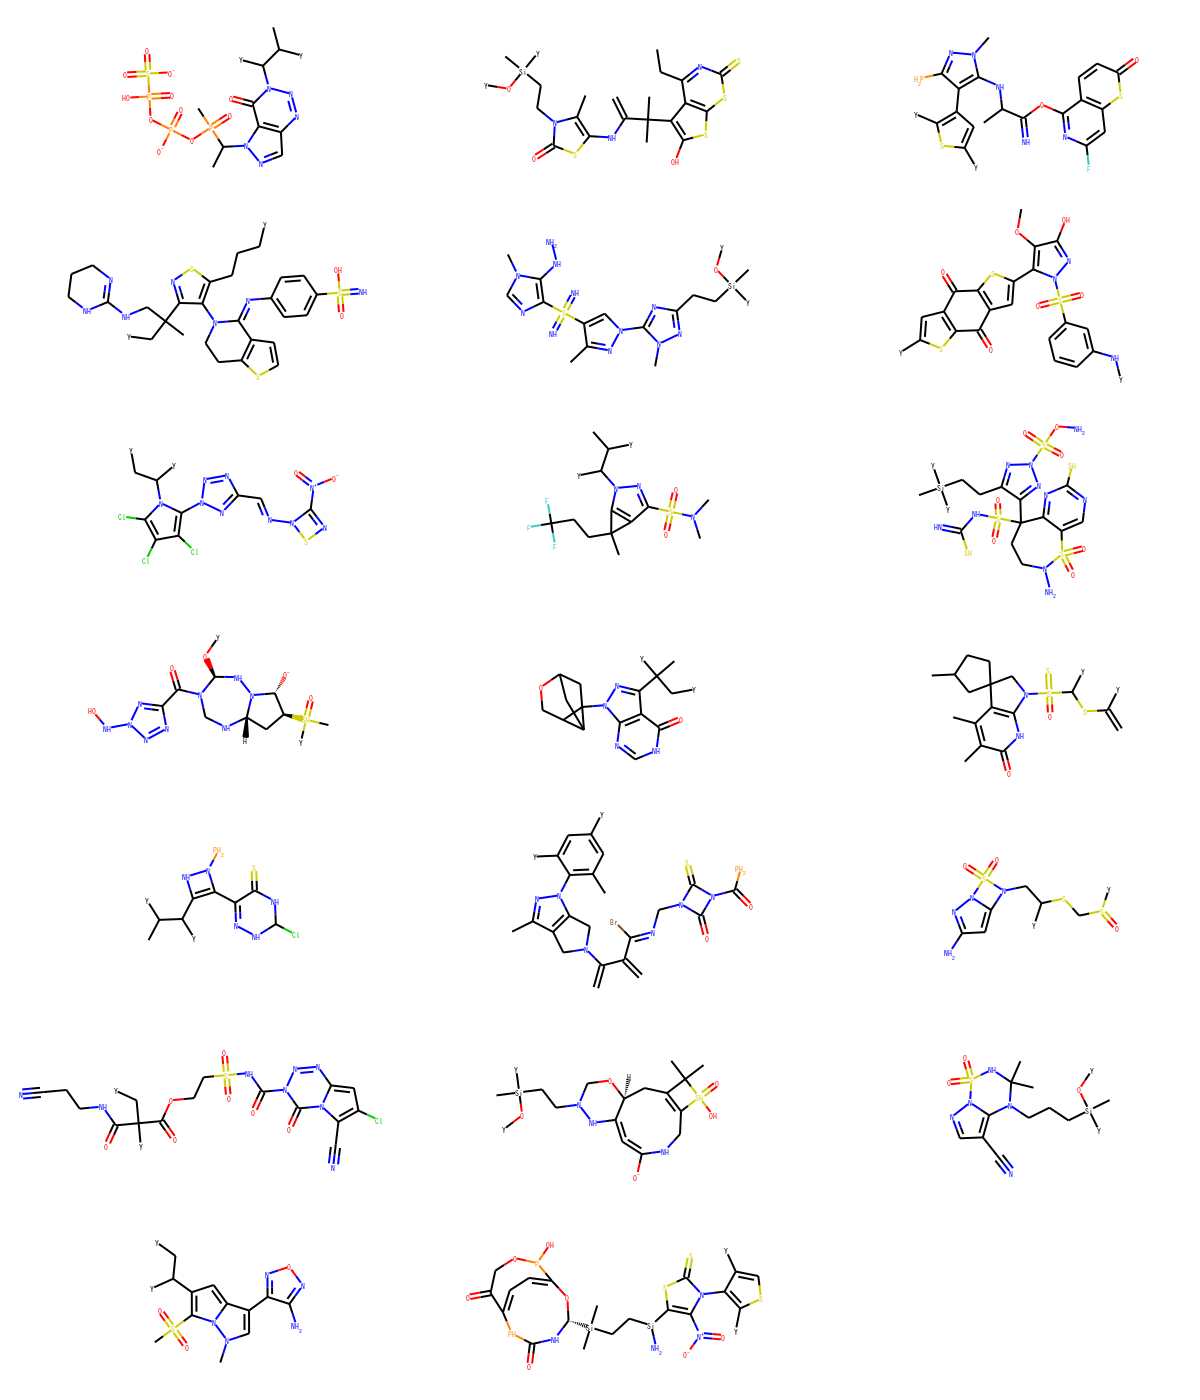

In [15]:
show_chemicals(sampled_df["Component1"])

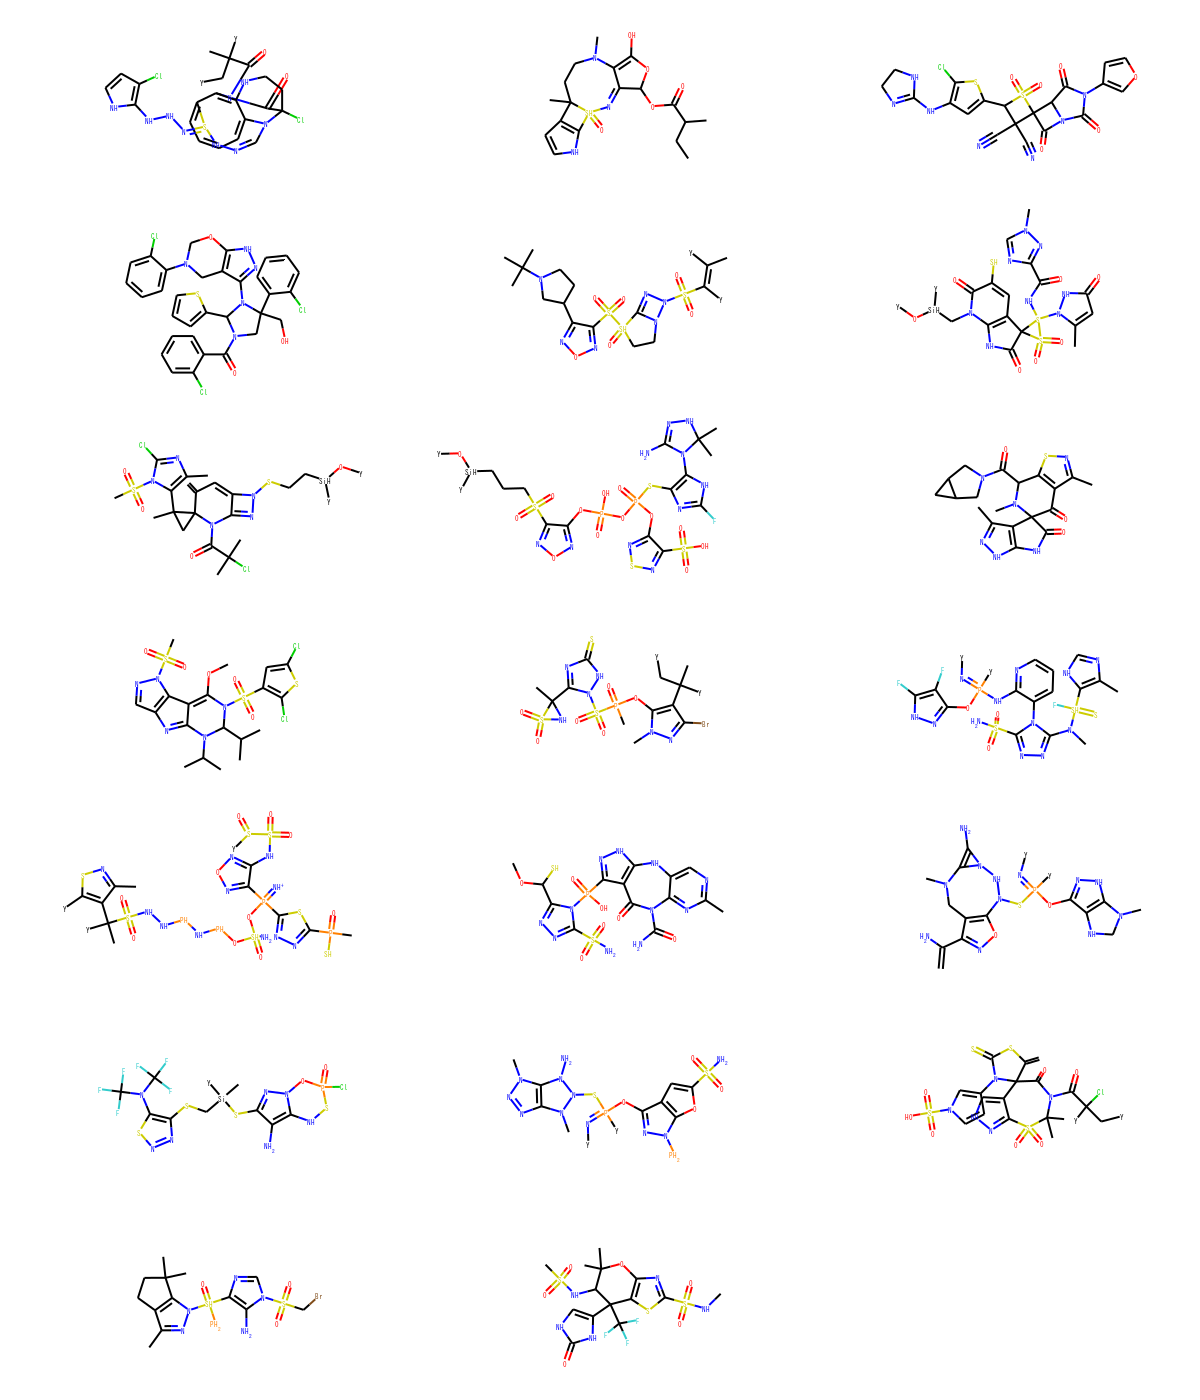

In [16]:
show_chemicals(sampled_df["Component2"])

In [17]:
#predict conductivity for a specific condition
condition=[
    "ClC1=CC(N(CC(O[Mg])C[Mg])C(C=CC=C2)=C2S3)=C3C=C1",
    "N#CC(C#N)=c1ccc(cc1)=C(C#N)C#N",
]

10**screen_predict(condition)

7.616626927263825e-05